(6, 2)
X:  [[1.4]
 [1. ]
 [1.5]
 [3. ]
 [3.8]
 [4.1]]
y:  [0. 0. 0. 1. 1. 1.]
X:  [[1.  1.4]
 [1.  1. ]
 [1.  1.5]
 [1.  3. ]
 [1.  3.8]
 [1.  4.1]]
y:  [0. 0. 0. 1. 1. 1.]


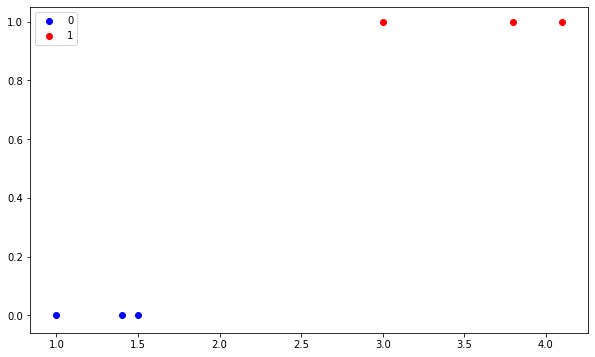

In [2]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_1D.csv', dtype=None, delimiter=',', skip_header=1) 
print(iris.shape)
X = iris[:, :1]
y = iris[:, 1]

print('X: ', X)
print('y: ', y)

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], y[y == 0], color='b', label='0')
plt.scatter(X[y == 1][:, 0], y[y == 1], color='r', label='1')
plt.legend()

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

print('X: ', X)
print('y: ', y)

In [3]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def predict(X, theta):    
    h = sigmoid_function(np.dot(X, theta))
    return h.round()

lr = 0.01
num_iter=1

theta = np.array([0.1, -0.1])

losses = []
accs   = []

for i in range(num_iter):
    #print('data: ', X)
    #print('theta: ', theta)
    
    z = np.dot(X, theta)
    #print('z: ', z)
    y_hat = sigmoid_function(z)
    #print('y_hat: ', y_hat)
    
    loss = loss_function(y_hat, y)
    print('loss: ', loss)

    # compute mean of gradient
    gradient = np.dot(X.T, (y_hat - y)) / y.size
    #print('(y_hat - y): ', (y_hat - y))
    #print('gradient: ', gradient)
    
    theta -= lr*gradient    
    print('new theta: ', theta)

    if(i % 1 == 0):
        # loss
        losses.append(loss)
        
        # accuracy
        preds = predict(X, theta)
        acc = (preds == y).mean()
        accs.append(acc)

loss:  0.7560200141969865
new theta:  [ 0.1003646  -0.09289708]


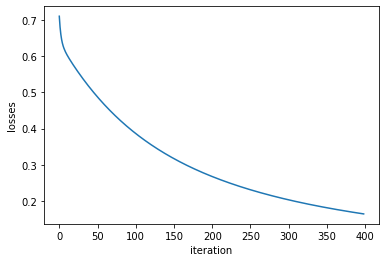

In [6]:
import matplotlib.pyplot as plt

plt.plot(losses[1:])
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

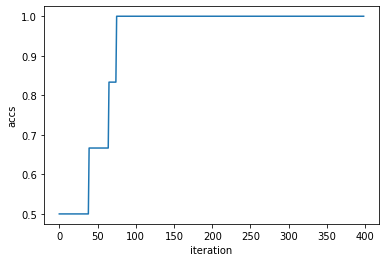

In [7]:
import matplotlib.pyplot as plt

plt.plot(accs[1:])
plt.xlabel('iteration')
plt.ylabel('accs')
plt.show()